<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Keyword_Clarity_TF_IDF_Powered_Web_Keyword_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:-  Keyword Clarity: TF-IDF Powered Web Keyword Extractor**

**Objective:-** The primary purpose of the project "**Keyword Clarity: TF-IDF Powered Web Keyword Extractor**" is to help website owners identify and analyze the most important keywords on their web pages. By using the TF-IDF (Term Frequency-Inverse Document Frequency) method, the project pinpoints which words are significant within a webpage's content compared to other pages. This information is critical for optimizing content for search engines, improving SEO, and ultimately enhancing the website's visibility and traffic.





**What is TF-IDF?**

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It's a method used to evaluate how important a word is in a particular document compared to all the other documents in a collection (or corpus). In simple terms, it's a way to find out which words are most significant in a piece of text by considering how often they appear in that text and how rare they are across other texts.

**Breaking Down TF-IDF**

1.  **Term Frequency (TF):**

         
   *   This measures how frequently a word appears in a document. The more times a word appears, the higher its TF score.

   *   **Example:** If the word "cat" appears 10 times in a 100-word article, the TF for "cat" would be 10/100 = 0.1.

2.   **Inverse Document Frequency (IDF):**



*   This measures how unique or rare a word is across multiple documents. If a word appears in many documents, its IDF score is lower. If it appears in fewer documents, its IDF score is higher.

*   **Example:** If "cat" appears in 1 out of 10 documents, the IDF would be higher, showing that "cat" is relatively unique. If "the" appears in all 10 documents, its IDF would be lower because it's common.



3.   **TF-IDF Score:**

       
*   The TF-IDF score is the product of TF and IDF. It helps highlight words that are frequent in a document but not common in many documents, marking them as important keywords.

*   **Example:** If "cat" has a high TF and a high IDF, its TF-IDF score will be high, indicating it's a significant term in that document.


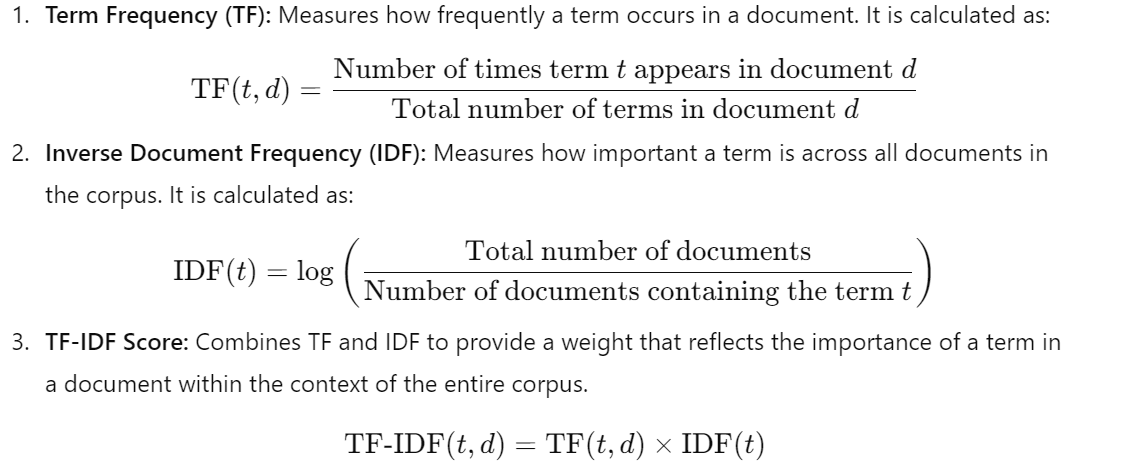



4. **TF-IDF:**

     

*   **Importance and Context:** TF-IDF helps identify the most important words in a document, considering both their frequency within the document and their rarity across other documents. This makes it more powerful for identifying keywords and understanding what makes a document unique.

*   **Use Case:** TF-IDF is widely used in search engines, information retrieval, and SEO to rank documents based on their relevance to a query, extract keywords, and enhance the quality of content analysis.














**Use Cases of TF-IDF**
1. **SEO (Search Engine Optimization):**

    *   TF-IDF helps in identifying which keywords are most relevant to a specific page of content. Website owners can optimize these keywords to improve their search engine rankings.
2. **Content Creation:**
   *   It helps content creators understand what words are important in their articles or pages, guiding them to focus on the right topics and terms.

3. **Competitor Analysis:**

     *   By analyzing competitors' content using TF-IDF, website owners can identify gaps or opportunities to target specific keywords that competitors might have missed.






















In [ ]:
#Step 1: Install Required Libraries
!pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import re


In [ ]:
url = "https://thatware.co/"
response= requests.get(url)


**soup = BeautifulSoup(response.text, 'html.parser')**

*   **Why response.text instead of response.content**

**response.text is used because:**

*   **Automatic Decoding:** It automatically decodes the content according to the charset specified in the response headers. This is useful for parsing HTML content, as it ensures the text is in the correct encoding before it's passed to BeautifulSoup.

*   **Simplicity:** Since response.text gives a Unicode string, it's ready for immediate use with BeautifulSoup, which works well with Unicode strings. This approach avoids potential issues with character encoding that could arise if the encoding isn't correctly guessed or handled by BeautifulSoup.

**Encoding:** response.text automatically decodes the content of the response based on the response headers. It uses the charset specified in the Content-Type header (e.g., utf-8, iso-8859-1).



*   **Use Case:** You would use response.text when you want the HTML content as a string and when the website properly specifies the encoding in the headers.

*   Here, **response.text** is useful because it gives you the HTML content as a decoded string, which BeautifulSoup can then parse into a navigable tree structure.









In [ ]:
 # Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US"> <![endif]-->
<!--[if gt IE 9]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head><meta charset="utf-8"/><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}</script><script>(()=>{class RocketLazyLoadScripts{constructor(){this.v="1.2.6",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this.t.bind(this),this.touchStartHandler=this.i.bind(this),this.touchMoveHandler=this.o.bind(this),this.touchEndHandler=th

**The Purpose of decompose() for script and style Elements**

When you scrape a webpage, the HTML content often includes various elements such as `&lt;script&gt;`, `&lt;style&gt;`, and others that are not relevant to the main text content. These elements contain JavaScript code, CSS styles, or other content that you typically do not want in your text extraction because they can introduce unnecessary noise.



1.   Identifying script and style Elements:



*   `soup(['script', 'style'])`: This part of the code searches the HTML content for all `&lt;script&gt;` and `&lt;style&gt;` elements. These tags usually contain JavaScript code or CSS styling, which do not contribute to the main textual content of a webpage.


2.   Removing script and style Elements:
  


*   script_or_style.decompose(): The decompose() method is used to remove these elements entirely from the BeautifulSoup object (soup). This means that after this operation, the soup object no longer contains any of the script or style content.



1.   Extracting Clean Text:

   

*   `text = soup.get_text()`: After removing the `&lt;script&gt;` and `&lt;style&gt;` elements, this line extracts all the remaining text from the HTML, which is now cleaner and more representative of the actual content displayed on the webpage.


**Cleaner Text Extraction:** By removing the script and style elements, you ensure that the extracted text is focused on the content that is visible to users (e.g., paragraphs, headings, links) rather than behind-the-scenes code or styles. This leads to a more accurate and meaningful extraction of the website's text.


**Avoiding Noise:** If you don't remove these elements, the extracted text might include large blocks of JavaScript code or CSS styles, which are not useful for most text analysis tasks, such as creating a Bag of Words (BoW) model or calculating TF-IDF scores.



















In [ ]:
# Remove script and style elements to clean the content
for script_or_style in soup(['script', 'style']):
    script_or_style.decompose()

# Extract the text content from the HTML
text = soup.get_text()
text

'\n\n  \n\n\n\n\n\n\n\nTHATWARE® - AI Powered SEO & Best Advanced SEO Agency\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSERVICES\n\nAdvanced SEO\nADVANCED DIGITAL MARKETING\nADVANCED LINK BUILDING\nFULLY MANAGED SEO\nBUSINESS INTELLIGENCE\nPAID MARKETING\nGoogle penalty recovery\nConversion Rate Optimization\nSOCIAL MEDIA MARKETING\nInformation Retrieval & NLP Services\nMarket Research Services\nCompetitor Keyword Analysis and Research Services\nContent Writing Services\nContent Proofreading Services\nWeb Development Services\nGraphic Design Services\nTechnology Consulting Services\nAWS Managed Services\nWebsite Maintenance Services\nBug and Software Testing Services\nCustom Software Development Services (SAAS)\nMobile and Web App Services\nUX Design Services\nUI Services\nChatbot Services\nWebsite Design Services\n\n\nWhy AI ?\nOUR COMPANY\n\nABOUT\nHOW IT WORKS\nHOW WE MANAGE\nCAREER\nABOUT AUT

# text = re.sub(r'\s+', ' ', text).strip()

**1. re.sub(r'\s+', ' ', text)**
*   **Purpose:** This part of the code replaces multiple consecutive whitespace characters (such as spaces, tabs, and newlines) with a single space.

**Components:**



*   **re.sub(pattern, replacement, string):** This is a function from Python's re module (regular expressions) that searches for all occurrences of a pattern in a string and replaces them with the specified replacement.


*   r'\s+' (Pattern):
   *   \s is a regular expression pattern that matches any whitespace character (spaces, tabs, newlines, etc.).

   *   " + is a quantifier that means "one or more occurrences."

   *   Together, \s+ matches one or more consecutive whitespace characters.

*   **' ' (Replacement):** This is a single space character that will replace the matched whitespace sequence.

*   **text (String):** This is the input text that you want to clean.

**Example:**
*   **Input Text:** "This is a\n\nsample text."

*   **Operation:** **re.sub(r'\s+', ' ', text)** will replace all instances of multiple spaces and newlines with a single space.

*   **Output:** "This is a sample text."

**2. .strip()**

*   **.strip():** This is a string method in Python that removes any whitespace characters from the beginning and end of the string. It does not affect whitespace within the string.

**Example:**

*   **Input Text:** "   This is a sample text.    "

*   **Operation: **.strip() will remove the spaces at the beginning and end of the string.

*   **Output:** "This is a sample text."

**3. Putting It All Together**

The combined operation cleans the text by:

*   Replacing multiple consecutive whitespace characters (including spaces, newlines, tabs) within the text with a single space.

*   Removing any leading or trailing whitespace from the beginning and end of the text.

# Full Example:-

import re

 **Original text with extra spaces and newlines**

text = "     This   is   a\n\nsample    text.       "

 **Clean the text by removing extra spaces and newlines**

text = re.sub(r'\s+', ' ', text).strip()

 **Output the cleaned text**

print(text)


**Output:**

"This is a sample text."

# Explanation of Why This is Important:



*   **Improves Readability:** The cleaned text is more readable and consistent, making it easier to analyze or display.

*   **Prepares Text for Further Processing:** By removing unnecessary spaces and newlines, the text is in a cleaner format, which is essential for tasks like natural language processing (NLP), text analysis, or when creating models like Bag of Words (BoW) or TF-IDF.


































In [ ]:
# Clean the text by removing extra spaces and newlines
text = re.sub(r'\s+', ' ', text).strip()
text

'THATWARE® - AI Powered SEO & Best Advanced SEO Agency SERVICES Advanced SEO ADVANCED DIGITAL MARKETING ADVANCED LINK BUILDING FULLY MANAGED SEO BUSINESS INTELLIGENCE PAID MARKETING Google penalty recovery Conversion Rate Optimization SOCIAL MEDIA MARKETING Information Retrieval & NLP Services Market Research Services Competitor Keyword Analysis and Research Services Content Writing Services Content Proofreading Services Web Development Services Graphic Design Services Technology Consulting Services AWS Managed Services Website Maintenance Services Bug and Software Testing Services Custom Software Development Services (SAAS) Mobile and Web App Services UX Design Services UI Services Chatbot Services Website Design Services Why AI ? OUR COMPANY ABOUT HOW IT WORKS HOW WE MANAGE CAREER ABOUT AUTHOR SEO CASE STUDIES AI CASE STUDIES AI SEO BLUEPRINT AI-SEO Video Become Our Reseller Our Corporate Deck SEO FAQ’s for Clients FAQ BLOGS CONTACT Pricing 360 Degree SEO Package Enterprise SEO Prici

#tfidf_vectorizer = TfidfVectorizer(stop_words='english')

**Purpose:**
*   This line initializes a **TfidfVectorizer** object from the sklearn **(scikit-learn)** library. The **TfidfVectorizer** is used to convert a collection of raw text documents into a matrix of **TF-IDF** features, which helps in identifying the importance of each word in the document relative to other words.

**Components:**


*   **TfidfVectorizer:** This is a tool that computes the **Term Frequency-Inverse Document Frequency (TF-IDF)** for each word in the text. **TF-IDF** is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (or corpus).

*   **stop_words='english':** This parameter tells the vectorizer to ignore common **English stop words** **(e.g., "the," "is," "and")**. Stop words are words that appear frequently but carry little meaningful information, so they are often removed in text analysis.

**Example:**
*   Let's say you have a document with the text: **"The quick brown fox jumps over the lazy dog."**


*   After removing stop words like **"the"** and **"over,"** the remaining words are **"quick brown fox jumps lazy dog".**













In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

#text_data = [text]

**The Text is Treated as a Single Document Inside a List**

**Purpose:**
*   This line places the text content into a list, treating it as a single document. TfidfVectorizer expects a list of documents, even if there's only one document, so we need to put the text in a list.

**Components:**

*   **text:** This is the cleaned text that you've extracted from the webpage.

*   **text_data = [text]:** This creates a list containing a single element (the text). This is necessary because the TfidfVectorizer expects an iterable of documents.

**Example:**


*   Suppose text = **"quick brown fox jumps lazy dog".**

*   Then text_data = **["quick brown fox jumps lazy dog"].**























In [ ]:
# The text is treated as a single document inside a list
text_data = [text]
text_data

['THATWARE® - AI Powered SEO & Best Advanced SEO Agency SERVICES Advanced SEO ADVANCED DIGITAL MARKETING ADVANCED LINK BUILDING FULLY MANAGED SEO BUSINESS INTELLIGENCE PAID MARKETING Google penalty recovery Conversion Rate Optimization SOCIAL MEDIA MARKETING Information Retrieval & NLP Services Market Research Services Competitor Keyword Analysis and Research Services Content Writing Services Content Proofreading Services Web Development Services Graphic Design Services Technology Consulting Services AWS Managed Services Website Maintenance Services Bug and Software Testing Services Custom Software Development Services (SAAS) Mobile and Web App Services UX Design Services UI Services Chatbot Services Website Design Services Why AI ? OUR COMPANY ABOUT HOW IT WORKS HOW WE MANAGE CAREER ABOUT AUTHOR SEO CASE STUDIES AI CASE STUDIES AI SEO BLUEPRINT AI-SEO Video Become Our Reseller Our Corporate Deck SEO FAQ’s for Clients FAQ BLOGS CONTACT Pricing 360 Degree SEO Package Enterprise SEO Pric

In [ ]:
# Compute the TF-IDF matrix (matrix of TF-IDF scores for words in the text)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_matrix

<1x773 sparse matrix of type '<class 'numpy.float64'>'
	with 773 stored elements in Compressed Sparse Row format>

# tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

**Purpose:**
*   This line computes the TF-IDF matrix for the text data. The matrix represents the TF-IDF scores of the words in the document. The fit_transform method first fits the model to the data (learning the vocabulary and the IDF values) and then transforms the text into a TF-IDF-weighted term-document matrix.

**Components:**
*   **fit_transform(text_data):** This method does two things:
  1.   **fit:** Learns the vocabulary from the text data and calculates the Inverse Document Frequency (IDF) for each term.

  2.   **transform:** Transforms the text data into a TF-IDF matrix, where each cell in the matrix represents the TF-IDF score of a word in the document.


*   **tfidf_matrix:** This is the output matrix containing the TF-IDF scores. Each row corresponds to a document (in this case, just one), and each column corresponds to a word in the vocabulary.

**Example:**
*   Let’s assume text = **"The quick brown fox jumps over the lazy dog."**.
*   After stop words are removed, you are left with **"quick brown fox jumps lazy dog"**
*   The TF-IDF matrix might look something like this (hypothetical scores):

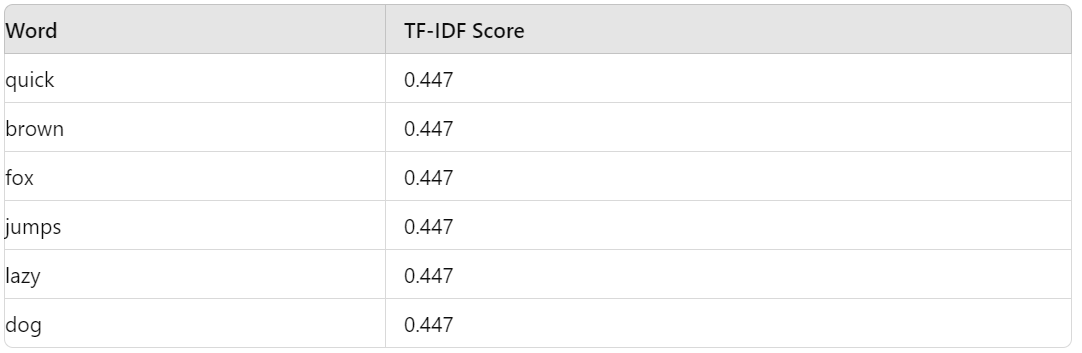


*   The matrix shows that all three words have the same TF-IDF score since they each appear once in a single document, and there are no other documents to compare with (hence IDF doesn’t change their weight).
















**1. Get the List of Feature Names (Words in the Document)**

#feature_names = tfidf_vectorizer.get_feature_names_out()

**Purpose:**
*   This line retrieves the list of words (features) that were identified by the TfidfVectorizer during the fitting process.

**Components:**


*   **get_feature_names_out():** This method returns an array of the words (features) that were identified from the text data.

**Example:**
*   Given the text **"quick brown fox jumps lazy dog"**, the feature_names array might look like this:

*   feature_names: **['brown', 'dog', 'fox', 'jumps', 'lazy', 'quick']**

**2. Create a Dictionary of Words and Their Corresponding TF-IDF Scores**

# tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

**Purpose:**

*   This line creates a dictionary that maps each word (from feature_names) to its corresponding TF-IDF score (from tfidf_matrix). This allows you to easily see the importance of each word in the document.

**Components:**

*   **{} (Dictionary Comprehension):** A Python technique to create a dictionary in a concise way.

*   **feature_names[i]:** Refers to the word at index i in the feature_names array.
*   **tfidf_matrix[0, i]:** Retrieves the TF-IDF score for the word at index i in the document (first row of the matrix).

*   for i in range(len(feature_names)): Loops through each index in the feature_names array.

**Example:**
*   Given feature_names = **['brown', 'dog', 'fox', 'jumps', 'lazy', 'quick']** and the corresponding **TF-IDF scores** from the matrix, the dictionary might look like this **:**

tfidf_scores = {
  
    'brown': 0.447,
    'dog': 0.447,
    'fox': 0.447,
    'jumps': 0.447,
    'lazy': 0.447,
    'quick': 0.447
}


























In [ ]:
# Get the list of feature names (words in the document)

feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary of words and their corresponding TF-IDF scores

tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}
tfidf_scores

{'000': 0.006599545966855682,
 '000602': 0.006599545966855682,
 '0064': 0.006599545966855682,
 '00checkouts': 0.006599545966855682,
 '08': 0.006599545966855682,
 '1000': 0.013199091933711365,
 '10000': 0.013199091933711365,
 '104': 0.006599545966855682,
 '140qualified': 0.006599545966855682,
 '1500': 0.013199091933711365,
 '173': 0.006599545966855682,
 '19cgjpb6316h1zf': 0.006599545966855682,
 '200': 0.013199091933711365,
 '2017': 0.006599545966855682,
 '202131021713': 0.006599545966855682,
 '2024': 0.02639818386742273,
 '2500': 0.006599545966855682,
 '2501': 0.006599545966855682,
 '29': 0.006599545966855682,
 '3500': 0.006599545966855682,
 '3501': 0.006599545966855682,
 '360': 0.013199091933711365,
 '42': 0.006599545966855682,
 '50': 0.006599545966855682,
 '500': 0.013199091933711365,
 '5000': 0.013199091933711365,
 '5001': 0.006599545966855682,
 '521': 0.006599545966855682,
 '5xx': 0.006599545966855682,
 '600': 0.006599545966855682,
 '6979': 0.006599545966855682,
 '7044080698': 0.006

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def scrape_website(url):
    # Send a request to the website and get the content
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve the content from {url}")
        return ""

    # Parse the website content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text content from the website by removing script and style elements
    for script_or_style in soup(['script', 'style']):
        script_or_style.decompose()

    # Get the text content and clean it
    text = soup.get_text()
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace

    return text

def calculate_tfidf(text):
    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the text into a list (it expects a list of documents)
    text_data = [text]

    # Compute the TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Convert TF-IDF matrix to a dictionary of words and their scores
    tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

    return tfidf_scores

def main():
    # Example URL - you can replace this with any website URL
    url = "https://thatware.co/"

    # Scrape the website
    text = scrape_website(url)

    # Check if text was retrieved
    if not text:
        print("No text found on the website.")
        return

    # Calculate TF-IDF scores
    tfidf_scores = calculate_tfidf(text)

    # Sort and print the top 50 keywords by TF-IDF score
    sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

    print("Top 50 keywords by TF-IDF score:")
    for keyword, score in sorted_keywords[:50]:
        print(f"{keyword}: {score:.4f}")

if __name__ == "__main__":
    main()


Top 50 keywords by TF-IDF score:
seo: 0.8051
services: 0.3432
ai: 0.2442
advanced: 0.1452
google: 0.1056
thatware: 0.0858
marketing: 0.0792
data: 0.0594
algorithms: 0.0528
based: 0.0528
building: 0.0528
content: 0.0528
development: 0.0528
link: 0.0528
search: 0.0528
algorithm: 0.0462
business: 0.0462
optimization: 0.0462
strategies: 0.0462
company: 0.0396
intelligence: 0.0396
media: 0.0396
online: 0.0396
page: 0.0396
best: 0.0330
case: 0.0330
clients: 0.0330
digital: 0.0330
diy: 0.0330
faq: 0.0330
read: 0.0330
science: 0.0330
strategy: 0.0330
website: 0.0330
2024: 0.0264
agency: 0.0264
artificial: 0.0264
backlink: 0.0264
contact: 0.0264
design: 0.0264
edge: 0.0264
globally: 0.0264
india: 0.0264
keyword: 0.0264
llp: 0.0264
managed: 0.0264
nlp: 0.0264
provide: 0.0264
real: 0.0264
research: 0.0264


**Below is a Python script that allows you to input multiple website URLs, scrape their content, and then compute the TF-IDF scores for each site. The code includes detailed comments to help a non-tech person understand each step.**

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def scrape_website(url):
    """
    This function takes a website URL as input, sends a request to the site,
    and extracts the main text content by removing unnecessary HTML tags, scripts, and styles.
    """
    try:
        # Send an HTTP request to the website
        response = requests.get(url)

        # Check if the request was successful (status code 200 means success)
        if response.status_code != 200:
            print(f"Failed to retrieve the content from {url}")
            return ""

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove script and style elements to clean the content
        for script_or_style in soup(['script', 'style']):
            script_or_style.decompose()

        # Extract the text content from the HTML
        text = soup.get_text()

        # Clean the text by removing extra spaces and newlines
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    except Exception as e:
        print(f"An error occurred while scraping {url}: {e}")
        return ""

def calculate_tfidf(text):
    """
    This function takes the cleaned text content from a website as input and calculates the TF-IDF scores.
    It returns a dictionary where each word is associated with its TF-IDF score.
    """
    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # The text is treated as a single document inside a list
    text_data = [text]

    # Compute the TF-IDF matrix (matrix of TF-IDF scores for words in the text)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # Get the list of feature names (words in the document)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a dictionary of words and their corresponding TF-IDF scores
    tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

    return tfidf_scores

def analyze_website_content(url):
    """
    This function scrapes the content of the given website URL, calculates the TF-IDF scores,
    and then prints the top keywords based on their scores.
    """
    print(f"Analyzing content from: {url}\n")

    # Scrape the website content
    text = scrape_website(url)

    # If no text was retrieved, skip to the next website
    if not text:
        print("No text found on the website.")
        return

    # Calculate TF-IDF scores for the website's text content
    tfidf_scores = calculate_tfidf(text)

    # Sort the keywords by their TF-IDF score in descending order
    sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

    # Print the top 20 keywords by TF-IDF score
    print("Top 20 keywords by TF-IDF score:")
    for keyword, score in sorted_keywords[:20]:
        print(f"{keyword}: {score:.4f}")

def main():
    """
    The main function where we define multiple website URLs, analyze each one,
    and print the TF-IDF results for each site.
    """
    # Example URLs for Testing
    websites = ['https://thatware.co/',  #Thatware homepage
        'https://www.wikipedia.org/',    # Wikipedia homepage
        'https://www.bbc.com/',          # BBC News homepage
        'https://www.nytimes.com/'       # New York Times homepage
    ]

    # Loop through each website URL in the list
    for site in websites:
        # Analyze the content and print the results
        analyze_website_content(site)
        # Print a separator for better readability between different website results
        print("\n" + "="*50 + "\n")

if __name__ == "__main__":
    main()


Analyzing content from: https://thatware.co/

Top 20 keywords by TF-IDF score:
seo: 0.8051
services: 0.3432
ai: 0.2442
advanced: 0.1452
google: 0.1056
thatware: 0.0858
marketing: 0.0792
data: 0.0594
algorithms: 0.0528
based: 0.0528
building: 0.0528
content: 0.0528
development: 0.0528
link: 0.0528
search: 0.0528
algorithm: 0.0462
business: 0.0462
optimization: 0.0462
strategies: 0.0462
company: 0.0396


Analyzing content from: https://www.wikipedia.org/

Top 20 keywords by TF-IDF score:
ðºð: 0.3324
000: 0.2908
free: 0.2701
âµ: 0.2285
²à: 0.2077
¾à: 0.2077
articles: 0.1662
èª: 0.1662
wikipedia: 0.1454
ªà: 0.1454
ð¹: 0.1454
bahasa: 0.1246
english: 0.1039
à²: 0.1039
ð²ð: 0.1039
ðºñ: 0.1039
ð½ñ: 0.1039
basa: 0.0831
ina: 0.0831
lã: 0.0831


Analyzing content from: https://www.bbc.com/

Top 20 keywords by TF-IDF score:
hrs: 0.6677
bbc: 0.1781
agous: 0.1335
days: 0.1335
mins: 0.1335
trump: 0.1187
says: 0.1039
attack: 0.0890
chat: 0.0890
iran: 0.0890
tech: 0.0890
12: 0.0742
claims: 0.0742
inves

#1. Understanding the Importance of TF-IDF and Keywords

*   "The TF-IDF analysis provides a clear picture of which keywords your website content is currently emphasizing. These keywords are critical as they indicate what your content is most focused on, and by extension, what search engines might recognize your site for."

**Example:**

*   "For instance, in the analysis of your website (ThatWare), the keyword 'SEO' has a very high TF-IDF score, indicating that this term is highly emphasized. This suggests that search engines may associate your site strongly with SEO-related content."

#2. Aligning Content with SEO Strategy

*   "By understanding which keywords have the highest TF-IDF scores, you can ensure that your website is aligned with your intended SEO strategy. If certain important keywords are missing or underrepresented, this is a clear sign that you need to adjust your content to better target those terms."

**Example:**


*   "If your goal is to rank highly for AI-driven marketing strategies, but 'AI' has a lower TF-IDF score than expected, this indicates a need to incorporate more AI-focused content on your site. This could involve creating new blog posts, case studies, or pages that specifically target 'AI' as a key term."

#3. Comparing with Competitors and Finding Opportunities

*   "You can use these TF-IDF insights to compare your content against that of your competitors. By identifying which keywords they are ranking for that you may not be focusing on, you can find opportunities to fill those gaps and stand out in the market."

**Example:**


*   "Suppose your competitor's website emphasizes 'algorithm optimization' with high TF-IDF scores, but your site does not. You could create content around 'algorithm optimization' to capture traffic that your competitor is currently attracting, giving you an edge."

**4. Impact on Search Engine Rankings and Traffic**



*   "Optimizing content based on TF-IDF scores can have a direct impact on search engine rankings. By focusing on high-value keywords that are both relevant and not overly saturated, you can improve your site's visibility on search engines, leading to increased organic traffic."

**Example:**


*   "For instance, if 'SEO services' has a high TF-IDF score on your site but isn't driving the expected traffic, it may be worth exploring why—perhaps by improving on-page SEO factors or building backlinks to pages that emphasize this term. Adjusting your content to more effectively target these high-value keywords can help boost your rankings."

# 5. Steps to Compete in the SEO Market

*   "To effectively compete in the SEO market, it's crucial to regularly analyze and adjust your content based on the latest keyword data. Here's how you can do it:"

**Steps:**

1.   **Regularly Monitor TF-IDF Scores:**



*   "Continuously monitor the TF-IDF scores of your content. Identify which keywords are gaining traction and which are not performing as expected."

*   **Example:** "Track **'AI'** and **'SEO services'** monthly to see if they continue to be strong keywords or if adjustments are needed."


**2.   Content Optimization:**

*   "Update your content to emphasize high-TF-IDF keywords that align with your business goals. Create new content to target keywords that are currently underrepresented."


*   **Example:** "If 'data-driven marketing' is a growing trend, create blog posts or case studies that focus on this area to capture new search traffic."



**3.   Competitor Analysis:**

*   "Compare your TF-IDF results with those of your competitors. Identify areas where you can outperform them by targeting keywords they are missing or underutilizing."

*   **Example:** "If a competitor ranks highly for 'link building strategies' but has low TF-IDF for 'content development,' you can create content that bridges these topics."


**4.   Adjust and Iterate:**
*   "SEO is an ongoing process. Continuously adjust your strategy based on new data, changes in search engine algorithms, and shifts in user behavior."

*   Example: "If Google updates its algorithm to favor long-form content, consider expanding your articles and incorporating more high-TF-IDF keywords naturally throughout."

#6. How These Insights Will Help Increase Traffic and Rankings



*   "By focusing on the right keywords and ensuring your content is aligned with the needs of your audience and the algorithms of search engines, you can drive more qualified traffic to your site. This increased traffic will not only boost your rankings but also lead to higher engagement and conversions."


**Example:**


*   "If 'advanced SEO services' has a high TF-IDF score but isn't driving the expected traffic, you might need to optimize the landing page for this keyword further, perhaps by improving meta tags, enhancing the user experience, or building more internal links. These changes can help ensure that the keyword performs better, leading to an increase in traffic and a higher ranking."

*   "By optimizing your landing page for the keyword 'advanced SEO services,' you can ensure that your content is better aligned with both search engine algorithms and user expectations. Enhancing your meta tags will improve how your page is represented in search results, while a better user experience will keep visitors engaged and encourage them to take action. Building more internal links will not only help users navigate your site but also boost the SEO value of your pages by distributing page authority. These combined efforts will lead to higher search engine rankings, increased traffic, and ultimately more conversions."


# Conclusion:



*   "By leveraging the insights from the TF-IDF analysis, you can fine-tune your content strategy, outperform competitors, and improve your site's visibility in search engine results. This strategic approach will not only help you attract more traffic but also position your brand as a leader in your industry."































